### Introduction to Machine Learning, UZH FS18, Group Project

### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch


#     
# II.     Feature Selection & Classification with Random Forest

In [1]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# import packages
import numpy as np
import pandas as pd
import matplotlib as pl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
import sklearn as skl
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import neural_network
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import neighbors
from functools import reduce
from functools import reduce
from pandas.core import datetools

from sklearn.decomposition import PCA


# Import datasets


In [2]:
# Import imputed dataset
imputed_dataset = pd.read_csv('Data/generated/imputed_dataset_ml.csv', sep = ',')
# Import dataset wit dropped Nans
dropnan_dataset = pd.read_csv('Data/generated/dropnan_dataset_ml.csv', sep = ',')

print('Shape of Imputed Dataset = ' + str(imputed_dataset.shape))
print('Shape of Dataset with Nans dropped = ' + str(dropnan_dataset.shape))



Shape of Imputed Dataset = (3519, 94)
Shape of Dataset with Nans dropped = (1430, 94)


###   
# Feature Selection with Random Forest
###   
## Feature Selection 
## for Version 1: Imputed Dataset
## for Version 2: Dataset with rows deleted where Nan
###   


## Feature Matrix and Response Vector 

#### Version 1: Imputed Dataset

In [3]:
# Extract labels of features
labels_of_features_1 = imputed_dataset.columns[:-1]
type(labels_of_features_1)

# X1 is the feature matrix
X1 = imputed_dataset.iloc[:, :-1]
print("")
print('Head of Feature Matrix X1')
display(X1.head())


# # y1 is the response vector
y1 = imputed_dataset.iloc[:, -1]
print("")
print('Head of Response Vector y1')
display(y1.head())




Head of Feature Matrix X1


,Unnamed: 0,PERMNO,DATE,NAICS,BIDLO,ASKHI,PRC,VOL,BID,ASK,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward
0,1,10107.0,1.138752e+18,511210.0,26.39,28.0400,26.87,11088149.0,26.87,26.88,...,1.323,0.151,0.025,0.0,0.036,6.281,10.280,0.0134,14.555,1.838
1,2,10107.0,1.141171e+18,511210.0,26.85,27.8900,27.21,14514337.0,27.24,27.24,...,1.323,0.151,0.025,0.0,0.036,6.293,10.410,0.0132,14.739,1.842
2,3,10107.0,1.143850e+18,511210.0,24.15,27.7400,24.15,14689919.0,24.16,24.16,...,1.323,0.151,0.025,0.0,0.036,5.573,9.239,0.0149,13.081,1.666
3,4,10107.0,1.146442e+18,511210.0,22.56,24.2900,22.65,23651189.0,22.70,22.70,...,1.388,0.150,0.025,0.0,0.024,5.496,0.709,0.0159,-5.842,1.480
4,5,10107.0,1.149120e+18,511210.0,21.51,23.4702,23.30,19980809.0,23.38,23.31,...,1.388,0.150,0.025,0.0,0.024,5.577,0.730,0.0155,-6.010,1.522



Head of Response Vector y1


0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: NEXT_DAY_PREDICTION, dtype: float64

#### Version 2: Dataset with rows dropped where Nan

In [4]:
# Extract labels of features
labels_of_features_2 = dropnan_dataset.columns[:-1]
type(labels_of_features_2)

# X2 is the feature matrix
X2 = dropnan_dataset.iloc[:, :-1]
print("")
print('Head of Feature Matrix X2')
display(X2.head())


# # y2 is the response vector
y2 = dropnan_dataset.iloc[:, -1]
print("")
print('Head of Response Vector y2')
display(y2.head())




Head of Feature Matrix X2


,Unnamed: 0,PERMNO,DATE,NAICS,BIDLO,ASKHI,PRC,VOL,BID,ASK,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward
0,73,10107,1328054400000000000,511210.0,29.890,31.87,31.740,9870347.0,31.73,31.74,...,1.556,0.130,0.027,0.0,0.053,4.085,0.783,0.0252,-20.961,1.367
1,74,10107,1330560000000000000,511210.0,31.555,32.85,32.255,9445449.0,32.24,32.25,...,1.556,0.130,0.027,0.0,0.053,4.155,0.796,0.0248,-21.784,1.468
2,76,10107,1335830400000000000,511210.0,29.060,32.01,29.190,10123951.0,29.19,29.20,...,1.508,0.132,0.027,0.0,0.060,3.497,0.636,0.0274,9.552,1.347
3,77,10107,1338508800000000000,511210.0,28.450,30.93,30.590,9679085.0,30.58,30.59,...,1.508,0.132,0.027,0.0,0.060,3.656,0.667,0.0262,-30.032,1.089
4,79,10107,1343779200000000000,511210.0,29.190,30.90,30.820,6689457.0,30.81,30.82,...,1.407,0.133,0.022,0.0,0.127,3.785,1.441,0.0260,1.451,1.767



Head of Response Vector y2


0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: NEXT_DAY_PREDICTION, dtype: float64

## Train - / Test - Split

#### Version 1: Imputed Dataset

In [5]:
# Do the train - test- split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0, stratify = y1)

# Check if there is the approximately same percentage of '1' i both training and test response vector
display(y1_train.sum() / y1_train.size)
display(y1_test.sum() / y1_test.size)


0.5602131438721136

0.5610795454545454

#### Version 2: Dataset with rows dropped where Nan

In [6]:
# Do the train - test- split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0, stratify = y2)

# Check if there is the approximately same percentage of '1' i both training and test response vector
display(y2_train.sum() / y2_train.size)
display(y2_test.sum() / y2_test.size)

0.5725524475524476

0.5734265734265734

## Standardize Variables

#### Version 1: Imputed Dataset

In [7]:
# Standardization with sklearn StandardScaler
standard_scaler_1 = preprocessing.StandardScaler().fit(X1_train)
X1_train = standard_scaler_1.transform(X1_train)
X1_test = standard_scaler_1.transform(X1_test)


#### Version 2: Dataset with rows dropped where Nan

In [8]:
# Standardization with sklearn StandardScaler
standard_scaler_2 = preprocessing.StandardScaler().fit(X2_train)
X2_train = standard_scaler_2.transform(X2_train)
X2_test = standard_scaler_2.transform(X2_test)


## Select Features according to their explanatory value / importance for the response

#### Version 1: Imputed Dataset

In [9]:
my_forest_1 = RandomForestClassifier(random_state = 1)
my_forest_1.max_depth = 8
my_forest_1.fit(X1_train, y1_train)

# Check features for their importance for the prediction
features_importances_1 = my_forest_1.feature_importances_

# sort features in line with their importance for the prediction
indices_1 = np.argsort(features_importances_1)[::-1]

# print best n features
n = 15
for i in range(n):
    print('{0:2d} {1:7s} {2:6.4f}'.format(i + 1, labels_of_features_1[indices_1[i]], 
                                          features_importances_1[indices_1[i]]))
del i


 1 vwretx  0.0663
 2 DATE    0.0533
 3 sprtrn  0.0453
 4 vwretd  0.0426
 5 ewretd  0.0383
 6 ewretx  0.0261
 7 divyield 0.0226
 8 BID     0.0210
 9 PEG_trailing 0.0189
10 pe_op_basic 0.0181
11 cash_lt 0.0167
12 PEG_1yrforward 0.0166
13 ASKHI   0.0160
14 ptb     0.0148
15 PEG_ltgforward 0.0148


#### Version 2: Dataset with rows dropped where Nan

In [10]:
my_forest_2 = RandomForestClassifier(random_state = 1)
my_forest_2.max_depth = 8
my_forest_2.fit(X2_train, y2_train)

# Check features for their importance for the prediction
features_importances_2 = my_forest_2.feature_importances_

# sort features in line with their importance for the prediction
indices_2 = np.argsort(features_importances_2)[::-1]

# print best m features
m = 15
for i in range(m):
    print('{0:2d} {1:7s} {2:6.4f}'.format(i + 1, labels_of_features_2[indices_2[i]], 
                                          features_importances_2[indices_2[i]]))
del i


 1 vwretd  0.0550
 2 ptb     0.0371
 3 vwretx  0.0368
 4 DATE    0.0341
 5 CAPEI   0.0311
 6 ewretd  0.0280
 7 ewretx  0.0261
 8 PEG_1yrforward 0.0249
 9 accrual 0.0233
10 pretret_earnat 0.0230
11 ps      0.0209
12 roe     0.0198
13 pcf     0.0197
14 pe_op_dil 0.0172
15 BID     0.0170


#### Version 1: Imputed Dataset

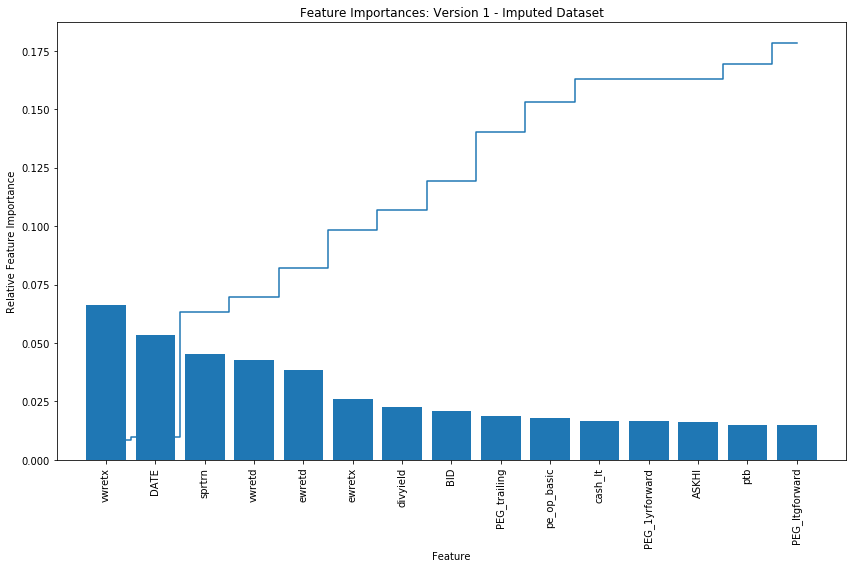

In [11]:
# Get cumsum of the n most important features
feat_imp_1 = np.sort(features_importances_1)[::-1]
sum_feat_imp_1 = np.cumsum(features_importances_1)[:n]

# Plot Feature IMportance (both cumulative and individual)
plt.figure(figsize = (12, 8))
plt.title('Feature Importances: Version 1 - Imputed Dataset')
plt.bar(range(n), features_importances_1[indices_1[:n]], align = 'center')
plt.xticks(range(n), labels_of_features_1[indices_1[:n]], rotation = 90)
plt.xlim([-1, n])
plt.xlabel('Feature')
plt.ylabel('Relative Feature Importance')
plt.step(range(n), sum_feat_imp_1, where = 'mid', label = 'Cumulative Feature Importance')
plt.tight_layout();

#### Version 2: Dataset with rows dropped where Nan

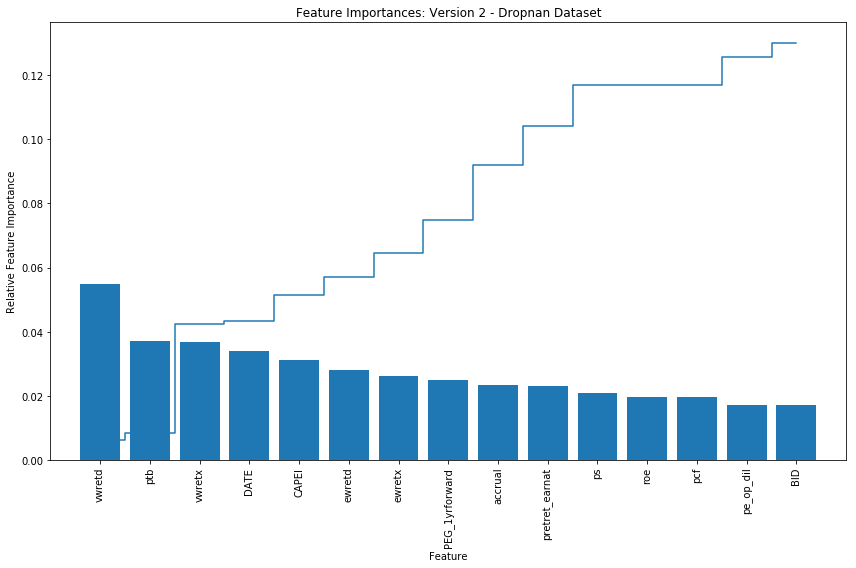

In [12]:
# Get cumsum of the n most important features
feat_imp_2 = np.sort(features_importances_2)[::-1]
sum_feat_imp_2 = np.cumsum(features_importances_2)[:m]

# Plot Feature IMportance (both cumulative and individual)
plt.figure(figsize = (12, 8))
plt.title('Feature Importances: Version 2 - Dropnan Dataset')
plt.bar(range(m), features_importances_2[indices_2[:m]], align = 'center')
plt.xticks(range(m), labels_of_features_2[indices_2[:m]], rotation = 90)
plt.xlim([-1, m])
plt.xlabel('Feature')
plt.ylabel('Relative Feature Importance')
plt.step(range(m), sum_feat_imp_2, where = 'mid', label = 'Cumulative Feature Importance')
plt.tight_layout();

## Extract best 'n' / 'm' Variables

In [13]:
#from sklearn.feature_selection import SelectFromModel

#selected_1 = SelectFromModel(RandomForestClassifier(), threshold = 'median')
#selected_1.fit(X1, y1)
#n_features = selected_1.transform(X1).shape[1]
#X1.head()

# =====> AUTOMATED FEATURE EXTRACTION WOULD BE EXTREEEMELY COOL
# =====> SELECTFROMMODEL ALGO CAN ONLY SELECT FEATURES ACCORDING TO THRESHOLD, NOT "BET N FEATURES" (?)

#### Version 1: Imputed Dataset

In [14]:
# Extract only the n best variables + the responsa varable (NEXT_DAY_PREDICTION)
imputed_dataset_f = imputed_dataset[['vwretx', 'DATE', 'sprtrn', 'vwretd', 'ewretd', 'ewretx', 'divyield', 'BID', 
                                     'PEG_trailing', 'pe_op_basic', 'cash_lt', 'PEG_1yrforward', 'ASKHI', 'ptb', 
                                     'PEG_ltgforward',
                                   'NEXT_DAY_PREDICTION']]

imputed_dataset_f.to_csv('Data/generated/imputed_dataset_ml_f.csv')

print("")
print('Imputed Dataset with chosen n features')
display(imputed_dataset_f.head())





Imputed Dataset with chosen n features


,vwretx,DATE,sprtrn,vwretd,ewretd,ewretx,divyield,BID,PEG_trailing,pe_op_basic,cash_lt,PEG_1yrforward,ASKHI,ptb,PEG_ltgforward,NEXT_DAY_PREDICTION
0,-0.003552,1.138752e+18,0.000453,-0.001637,0.004836,0.003476,0.0134,26.87,10.280,21.496,1.710,14.555,28.0400,6.281,1.838,1.0
1,0.017585,1.141171e+18,0.011065,0.019053,0.036978,0.035232,0.0132,27.24,10.410,21.768,1.710,14.739,27.8900,6.293,1.842,0.0
2,0.011494,1.143850e+18,0.012187,0.012965,0.009791,0.008497,0.0149,24.16,9.239,19.320,1.710,13.081,27.7400,5.573,1.666,0.0
3,-0.033025,1.146442e+18,-0.030917,-0.031045,-0.044331,-0.045982,0.0159,22.70,0.709,17.695,1.572,-5.842,24.2900,5.496,1.480,1.0
4,-0.001881,1.149120e+18,0.000087,-0.000386,-0.008479,-0.010474,0.0155,23.38,0.730,18.203,1.572,-6.010,23.4702,5.577,1.522,1.0


#### Version 2: Dataset with rows dropped where Nan

In [15]:
# Extract only the n best variables + the responsa varable (NEXT_DAY_PREDICTION)
dropnan_dataset_f = dropnan_dataset[['vwretd', 'DATE', 'pretret_earnat', 'ewretx', 'divyield', 'roe', 'ewretd', 'pcf',
                                     'pe_op_dil', 'CAPEI', 'PEG_1yrforward', 'ptb', 'BID', 'accrual', 'vwretx', 'ps',                        'pe_op_basic', 'cash_lt', 'PEG_1yrforward', 'ASKHI', 'ptb', 'PEG_ltgforward',
                                   'NEXT_DAY_PREDICTION']]

dropnan_dataset_f.to_csv('Data/generated/imputed_dataset_ml_f.csv')

display(dropnan_dataset_f.head())


,vwretd,DATE,pretret_earnat,ewretx,divyield,roe,ewretd,pcf,pe_op_dil,CAPEI,...,accrual,vwretx,ps,pe_op_basic,cash_lt,PEG_1yrforward,ASKHI,ptb,PEG_ltgforward,NEXT_DAY_PREDICTION
0,0.041186,1328054400000000000,0.352,0.035003,0.0252,0.421,0.036494,9.193,11.500,14.863,...,0.053,0.038914,3.696,11.376,1.093,-20.961,31.87,4.085,1.367,1.0
1,0.023994,1330560000000000000,0.352,0.015303,0.0248,0.421,0.017608,9.353,11.687,15.121,...,0.053,0.022110,3.760,11.561,1.093,-21.784,32.85,4.155,1.468,0.0
2,-0.065531,1335830400000000000,0.346,-0.070404,0.0274,0.391,-0.068434,8.204,10.653,13.332,...,0.060,-0.067942,3.358,10.500,1.123,9.552,32.01,3.497,1.347,1.0
3,0.038156,1338508800000000000,0.346,0.031622,0.0262,0.391,0.034188,8.577,11.164,13.939,...,0.060,0.036055,3.510,11.004,1.123,-30.032,30.93,3.656,1.089,0.0
4,0.026265,1343779200000000000,0.317,0.022964,0.0260,0.268,0.024820,8.170,11.289,14.175,...,0.127,0.023665,3.505,11.167,1.148,1.451,30.90,3.785,1.767,0.0


###   
# Prediction with Random Forest
###   
### Prediction
### for Version 1: Imputed Dataset
### for Version 2: Dataset with rows dropped where Nan
###   



## Feature Matrix and Response Vector with Selected Features


#### Version 1: Imputed Dataset

In [16]:
# Extract labels of features
labels_of_features_1 = imputed_dataset_f.columns[:-1]

# X1 is the feature matrix
X1 = imputed_dataset_f.iloc[:, :-1]
#display(X1.head())

# y1 is the response vector
y1 = imputed_dataset_f.iloc[:, -1]
#display(y1.head())


#### Version 2: Dataset with rows dropped where Nan

In [17]:
# Extract labels of features
labels_of_features_2 = dropnan_dataset_f.columns[:-1]

# X2 is the feature matrix
X2 = dropnan_dataset_f.iloc[:, :-1]
#display(X2.head())

# y2 is the response vector
y2 = dropnan_dataset_f.iloc[:, -1]
#display(y2.head())

## Train - / Test - Split with Selected Features

#### Version 1: Imputed Dataset

In [18]:
# Do the train - test- split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0, stratify = y1)

# Check if there is the approximately same percentage of '1' i both training and test response vector
display(y1_train.sum() / y1_train.size)
display(y1_test.sum() / y1_test.size)

0.5602131438721136

0.5610795454545454

#### Version 2: Dataset with rows dropped where Nan

In [19]:
# Do the train - test- split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0, stratify = y2)

# Check if there is the approximately same percentage of '1' i both training and test response vector
display(y2_train.sum() / y2_train.size)
display(y2_test.sum() / y2_test.size)


0.5725524475524476

0.5734265734265734

## Standardize Variables

In [20]:
# Version 1:
# Standardization with sklearn StandardScaler
standard_scaler_1 = preprocessing.StandardScaler().fit(X1_train)
X1_train = standard_scaler_1.transform(X1_train)
X1_test = standard_scaler_1.transform(X1_test)

# Version 2:
# Standardization with sklearn StandardScaler
standard_scaler_2 = preprocessing.StandardScaler().fit(X2_train)
X2_train = standard_scaler_2.transform(X2_train)
X2_test = standard_scaler_2.transform(X2_test)

## Prediction of Response Vector with Random Forest

#### Version 1: Imputed Dataset

In [21]:
# Test prediction of y1 with the test feature matrix: gives the prediction vector

my_forest_1 = RandomForestClassifier(random_state = 1)
my_forest_1.max_depth = 8
my_forest_1.fit(X1_train, y1_train)

prediction_1 = my_forest_1.predict(X1_test)

print("")
print('Predicted response Vector (First 10)')
display(prediction_1[0:10])


print("")
print('For comparison: Test-Response-Vector (First 10)')
display(np.array(y1_test[0:10]))


Predicted response Vector (First 10)


array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1.])


For comparison: Test-Response-Vector (First 10)


array([1., 0., 1., 0., 1., 0., 1., 1., 1., 1.])

#### Version 2: Dataset with rows dropped where Nan

In [22]:
# Test prediction of y2 with the test feature matrix: gives the prediction vector

my_forest_2 = RandomForestClassifier(random_state = 1)
my_forest_2.max_depth = 8
my_forest_2.fit(X2_train, y2_train)

prediction_2 = my_forest_2.predict(X2_test)

print("")
print('Predicted response Vector (First 10)')
display(prediction_2[0:10])


print("")
print('For comparison: Test-Response-Vector (First 10)')
display(np.array(y2_test[0:10]))


Predicted response Vector (First 10)


array([1., 1., 0., 1., 1., 1., 1., 0., 1., 1.])


For comparison: Test-Response-Vector (First 10)


array([1., 0., 1., 0., 1., 1., 0., 1., 1., 1.])

# Cross-Validation of Prediction-Results

#### Version 1: Imputed Dataset

In [23]:
# Calculate percentage of of ones in the test response vector
print('Ratio of Ones (Test 1)   =  ' + str(y1_test.sum() / y1_test.size))

# Just to be sure the ones are distributed ca.the same in test and train response vector, check this:
print('Ratio of Ones (Train 1)  =  ' + str(y1_train.sum() / y1_train.size))

# Calculate precentage of ones predicted with the model
print('Score (Prediction 1)     =  ' + str(prediction_1.sum() / prediction_1.size))

# Calculate the score surplus above the test-set response vector score
print('Score Surplus Prediction over Guess = ' + str((prediction_1.sum()/prediction_1.size) - 
                                                     (y1_test.sum()/y1_test.size)))


Ratio of Ones (Test 1)   =  0.5610795454545454
Ratio of Ones (Train 1)  =  0.5602131438721136
Score (Prediction 1)     =  0.7059659090909091
Score Surplus Prediction over Guess = 0.14488636363636365


#### Version 2: Dataset with rows dropped where Nan

In [24]:
# Calculate percentage of of ones in the test response vector
print('Ratio of Ones (Test 2)   =  ' + str(y2_test.sum() / y2_test.size))

# Just to be sure the ones are distributed ca.the same in test and train response vector, check this:
print('Ratio of Ones (Train 2)  =  ' + str(y2_train.sum() / y2_train.size))

# Calculate precentage of ones predicted with the model
print('Score (Prediction 2)     =  ' + str(prediction_2.sum() / prediction_2.size))

# Calculate the score surplus above the test-set response vector score
print('Score Surplus Prediction over Guess = ' + str((prediction_2.sum()/prediction_2.size) - 
                                                     (y2_test.sum()/y2_test.size)))


Ratio of Ones (Test 2)   =  0.5734265734265734
Ratio of Ones (Train 2)  =  0.5725524475524476
Score (Prediction 2)     =  0.7097902097902098
Score Surplus Prediction over Guess = 0.13636363636363635


# Cross Validation: tbc